<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/Modified_try_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install unrar
!unrar x /content/gdrive/MyDrive/dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/gdrive/MyDrive/dataset.rar

Creating    army                                                      OK
Extracting  army/1.png                                                     0%  OK 
Extracting  army/10.png                                                    0%  OK 
Extracting  army/100.png                                                   0%  OK 
Extracting  army/1000.png                                                  0%  OK 
Extracting  army/1002.png                                                  0%  OK 
Extracting  army/1003.png                                                  0%  OK 
Extracting  army/1004.png                                                  0%  OK 
Extracting  army/1005.png                                                  0%  OK 
Extracting  army/1006.png                                            

In [8]:
import os

base_dir = '/content/combined/'
os.mkdir(base_dir)

!mv /content/tanks /content/combined
!mv /content/men /content/combined
!mv /content/army /content/combined

In [9]:
# removing gif file

import os

# !rm -rf /content/main
img = os.listdir('/content/combined/men')
for i,v in enumerate(img):
  if v[-3:] == 'gif':
    # !rm -rf /content/combined/men/img[i]
    os.remove("/content/combined/men/{}".format(img[i]))

In [10]:
import os
for File in os.listdir("/content/combined/men"):
    if File.endswith(".gif"):
        print("true")

In [11]:
import os

main_dir = '/content/main/'
os.mkdir(main_dir)

In [19]:
# !rm -rf /content/main

In [12]:
#create two folders (train and validation)
train_dir = os.path.join(main_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(main_dir, 'test')
os.mkdir(test_dir)

#Under train folder create five folders 

train_cloud_dir = os.path.join(train_dir, 'army')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'men')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'tanks')
os.mkdir(train_rainy_dir)

#Under validation folder create five folders 

validation_cloud_dir = os.path.join(test_dir, 'army')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(test_dir, 'men')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(test_dir, 'tanks')
os.mkdir(validation_rainy_dir)

In [13]:
army_SOURCE_DIR = '/content/combined/army/'
TRAINING_army_DIR = '/content/main/train/army/'
test_army_DIR = '/content/main/test/army/'

men_SOURCE_DIR = '/content/combined/men/'
TRAINING_men_DIR = '/content/main/train/men/'
test_men_DIR = '/content/main/test/men/'

tanks_SOURCE_DIR = '/content/combined/tanks/'
TRAINING_tanks_DIR = '/content/main/train/tanks/'
test_tanks_DIR = '/content/main/test/tanks/'

In [14]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    print('training_length', training_length)
    valid_length = int(len(files) - training_length)
    print('test_length', valid_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [15]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(army_SOURCE_DIR, TRAINING_army_DIR, test_army_DIR, split_size)
split_data(men_SOURCE_DIR, TRAINING_men_DIR, test_men_DIR, split_size)
split_data(tanks_SOURCE_DIR, TRAINING_tanks_DIR, test_tanks_DIR, split_size)

training_length 1275
test_length 225
training_length 1197
test_length 212
training_length 917
test_length 162


# train data

In [16]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/main/train')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['men', 'army', 'tanks']
Types of classes labels found:  3


In [17]:
train_class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/main/train' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    train_class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(dataset_path, item, room)

In [18]:
# Build a dataframe        
df = pd.DataFrame(data=train_class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                          image
0    men  dataset_path/men/00001995.jpg
1    men  dataset_path/men/00000164.jpg
2    men  dataset_path/men/00001811.jpg
3    men  dataset_path/men/00001118.jpg
4    men  dataset_path/men/00000570.jpg
     Labels                                              image
3384  tanks              dataset_path/tanks/pt91_twardy_l4.jpg
3385  tanks  dataset_path/tanks/tank_technology_demonstrato...
3386  tanks                    dataset_path/tanks/t80ud_l1.jpg
3387  tanks              dataset_path/tanks/m1a2_abrams_l6.jpg
3388  tanks             dataset_path/tanks/challenger_1_l5.jpg


In [19]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3389
army     1275
men      1197
tanks     917
Name: Labels, dtype: int64


In [20]:
import cv2
path = '/content/main/train/'
dataset_path = os.listdir('/content/main/train')

im_size = 224

train_images = []
train_labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        train_images.append(img)
        train_labels.append(i)

/content/main/train/men
/content/main/train/army
/content/main/train/tanks


In [21]:
train_images = np.array(train_images)
print(train_images.shape)
train_images = train_images.astype('float32') / 255.0
# train_images = preprocess_input(train_images)
print(train_images.shape)

(3389, 224, 224, 3)
(3389, 224, 224, 3)


In [22]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

['men' 'men' 'men' ... 'tanks' 'tanks' 'tanks']
3389
['men', 'army', 'tanks']
[1 1 1 ... 2 2 2]
[0, 1, 2]


In [23]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[:-5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split


# train_images, Y = shuffle(train_images, Y, random_state=1)


# train_x, test_x, train_y, test_y = train_test_split(train_images, Y, test_size=0.2, random_state=0)

# #inpect the shape of the training and testing.
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

In [24]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [25]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
# change optimizer and loss function

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [26]:
hist = model.fit(train_images, Y, epochs=30, verbose=2)

Epoch 1/30
106/106 - 438s - loss: 2.3123 - accuracy: 0.4951
Epoch 2/30
106/106 - 425s - loss: 1.0007 - accuracy: 0.6801
Epoch 3/30
106/106 - 431s - loss: 0.8263 - accuracy: 0.7256
Epoch 4/30
106/106 - 439s - loss: 0.6794 - accuracy: 0.7728
Epoch 5/30
106/106 - 434s - loss: 0.5625 - accuracy: 0.8017
Epoch 6/30
106/106 - 433s - loss: 0.4635 - accuracy: 0.8362
Epoch 7/30
106/106 - 433s - loss: 0.3792 - accuracy: 0.8737
Epoch 8/30
106/106 - 440s - loss: 0.3230 - accuracy: 0.9026
Epoch 9/30
106/106 - 435s - loss: 0.2377 - accuracy: 0.9206
Epoch 10/30
106/106 - 442s - loss: 0.1999 - accuracy: 0.9448
Epoch 11/30
106/106 - 433s - loss: 0.2044 - accuracy: 0.9351
Epoch 12/30
106/106 - 429s - loss: 0.1678 - accuracy: 0.9501
Epoch 13/30
106/106 - 430s - loss: 0.2076 - accuracy: 0.9345
Epoch 14/30
106/106 - 437s - loss: 0.1743 - accuracy: 0.9425
Epoch 15/30
106/106 - 430s - loss: 0.1423 - accuracy: 0.9593
Epoch 16/30
106/106 - 427s - loss: 0.0823 - accuracy: 0.9737
Epoch 17/30
106/106 - 427s - loss

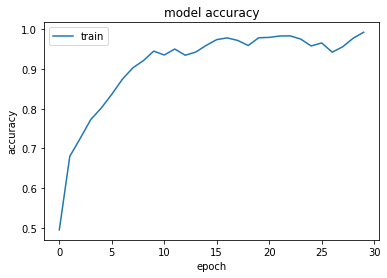

In [27]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

# Test data

In [28]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/main/test')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))


['men', 'army', 'tanks']
Types of classes labels found:  3


In [29]:
test_class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/main/test' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    test_class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(dataset_path, item, room)

In [30]:
# Build a dataframe        
df = pd.DataFrame(data=test_class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                          image
0    men  dataset_path/men/00000135.jpg
1    men  dataset_path/men/00002199.jpg
2    men  dataset_path/men/00001253.jpg
3    men  dataset_path/men/00001693.jpg
4    men  dataset_path/men/00001793.jpg
    Labels                               image
594  tanks       dataset_path/tanks/t64_l5.jpg
595  tanks  dataset_path/tanks/amx_32_main.jpg
596  tanks   dataset_path/tanks/lince_main.jpg
597  tanks       dataset_path/tanks/t62_l5.jpg
598  tanks    dataset_path/tanks/nkpz_main.jpg


In [38]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  599
army     225
men      212
tanks    162
Name: Labels, dtype: int64


In [39]:
import cv2
path = '/content/main/test/'
dataset_path = os.listdir('/content/main/test')

im_size = 224

test_images = []
test_labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        test_images.append(img)
        test_labels.append(i)

/content/main/test/men
/content/main/test/army
/content/main/test/tanks


In [40]:
test_images = np.array(test_images)
print(test_images.shape)
test_images = test_images.astype('float32') / 255.0
# test_images = preprocess_input(test_images)
print(test_images.shape)

(599, 224, 224, 3)
(599, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

In [42]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[:-5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [43]:
test_x = test_images
test_y = Y

# Prediction

In [44]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

19/19 [==============================] - 15s 742ms/step - loss: 0.4413 - accuracy: 0.8815
Loss = 0.4413282871246338
Test Accuracy = 0.8814691305160522


In [45]:
pred = model.predict(test_x)

from sklearn.metrics import confusion_matrix
pred = np.argmax(pred, axis=1)
test_y = np.argmax(test_y, axis=1)
confusion = confusion_matrix(test_y, pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[179  39   7]
 [ 13 195   4]
 [  5   3 154]]


# Saving Model

In [47]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [48]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# SAVING RESULTS

In [46]:
import os

res_dir = '/content/results/'
os.mkdir(res_dir)

#create two folders (train and validation)
army_dir = os.path.join(res_dir, 'army')
os.mkdir(army_dir)

men_dir = os.path.join(res_dir, 'men')
os.mkdir(men_dir)

tanks_dir = os.path.join(res_dir, 'tanks')
os.mkdir(tanks_dir)

#Under army folder create five folders 

army_cloud_dir = os.path.join(army_dir, 'army')
os.mkdir(army_cloud_dir)

army_foggy_dir = os.path.join(army_dir, 'men')
os.mkdir(army_foggy_dir)

army_rainy_dir = os.path.join(army_dir, 'tanks')
os.mkdir(army_rainy_dir)

#Under men folder create five folders 

men_cloud_dir = os.path.join(men_dir, 'army')
os.mkdir(men_cloud_dir)

men_foggy_dir = os.path.join(men_dir, 'men')
os.mkdir(men_foggy_dir)

men_rainy_dir = os.path.join(men_dir, 'tanks')
os.mkdir(men_rainy_dir)

#Under tanks folder create five folders 

tanks_cloud_dir = os.path.join(tanks_dir, 'army')
os.mkdir(tanks_cloud_dir)

tanks_foggy_dir = os.path.join(tanks_dir, 'men')
os.mkdir(tanks_foggy_dir)

tanks_rainy_dir = os.path.join(tanks_dir, 'tanks')
os.mkdir(tanks_rainy_dir)

In [54]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def arrange(img_path):
  name = img_path.split("tanks/",1)[1]
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224, 224))

  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  # print('Input image shape:', x.shape)

  preds=model.predict(x)
  # print(preds[0])
  joined = preds[0]
  joined = list(map(int,joined))
  label = ['men', 'army', 'tanks']
  zipped = zip(joined, label)
  for i in list(zipped):
    if i[0] == 1:
      print(i[1])
      copyfile(img_path, '/content/results/tanks/' + i[1] + '/'+ name)


In [ ]:
from shutil import copyfile

for filename in os.listdir('/content/main/test/tanks'):
  arrange('/content/main/test/tanks/'+filename)

In [ ]:
!zip -r /content/result.zip /content/results

In [57]:
from google.colab import files
files.download("/content/result.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>